In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import load_breast_cancer

In [12]:
data=load_breast_cancer()
print(type(data))
print("Keys: ")
print(data.keys())
print("Shape: ")
print(data.data.shape)

<class 'sklearn.utils.Bunch'>
Keys: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape: 
(569, 30)


In [13]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
# Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.data,
    data.target,
    test_size=.33
)
N, D = X_train.shape

In [16]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [19]:
# MODEL
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D, )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
r=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 2s 5ms/sample - loss: 0.6236 - acc: 0.7008 - val_loss: 0.5989 - val_acc: 0.6809
Epoch 2/100
381/381 [==============================] - 0s 51us/sample - loss: 0.5704 - acc: 0.7533 - val_loss: 0.5461 - val_acc: 0.7234
Epoch 3/100
381/381 [==============================] - 0s 50us/sample - loss: 0.5234 - acc: 0.7874 - val_loss: 0.5022 - val_acc: 0.7872
Epoch 4/100
381/381 [==============================] - 0s 55us/sample - loss: 0.4845 - acc: 0.8215 - val_loss: 0.4641 - val_acc: 0.8245
Epoch 5/100
381/381 [==============================] - 0s 49us/sample - loss: 0.4506 - acc: 0.8399 - val_loss: 0.4321 - val_acc: 0.8351
Epoch 6/100
381/381 [==============================] - 0s 50us/sample - loss: 0.4215 - acc: 0.8661 - val_loss: 0.4041 - val_acc: 0.8670
Epoch 7/100
381/381 [==============================] - 0s 52us/sample - loss: 0.3960 - acc: 0.8819 - val_loss: 0.3802 - val_acc: 0.8830
Epo

381/381 [==============================] - 0s 51us/sample - loss: 0.1110 - acc: 0.9843 - val_loss: 0.1387 - val_acc: 0.9468
Epoch 61/100
381/381 [==============================] - 0s 49us/sample - loss: 0.1098 - acc: 0.9843 - val_loss: 0.1379 - val_acc: 0.9468
Epoch 62/100
381/381 [==============================] - 0s 52us/sample - loss: 0.1088 - acc: 0.9843 - val_loss: 0.1372 - val_acc: 0.9468
Epoch 63/100
381/381 [==============================] - 0s 50us/sample - loss: 0.1078 - acc: 0.9843 - val_loss: 0.1365 - val_acc: 0.9468
Epoch 64/100
381/381 [==============================] - 0s 49us/sample - loss: 0.1067 - acc: 0.9843 - val_loss: 0.1358 - val_acc: 0.9468
Epoch 65/100
381/381 [==============================] - 0s 51us/sample - loss: 0.1057 - acc: 0.9843 - val_loss: 0.1352 - val_acc: 0.9468
Epoch 66/100
381/381 [==============================] - 0s 50us/sample - loss: 0.1048 - acc: 0.9843 - val_loss: 0.1346 - val_acc: 0.9468
Epoch 67/100
381/381 [==============================] 

In [20]:
# Evaluate the model
print("Train score: ", model.evaluate(X_train, y_train))
print("Test score:  ", model.evaluate(X_test, y_test))

381/381 [==============================] - 0s 24us/sample - loss: 0.0828 - acc: 0.9869
Train score:  [0.08281257730026258, 0.98687667]
188/188 [==============================] - 0s 24us/sample - loss: 0.1221 - acc: 0.9362
Test score:   [0.122079124832724, 0.9361702]


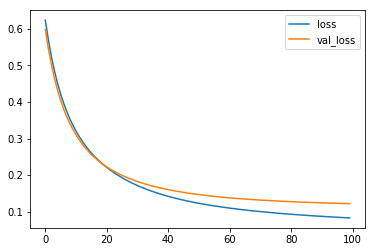

In [22]:
# PLOT
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

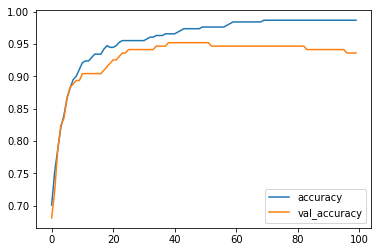

In [26]:
plt.plot(r.history['acc'], label='accuracy')
plt.plot(r.history['val_acc'], label='val_accuracy')
plt.legend()

In [28]:
print(model.predict(X_test))

[[9.47132885e-01]
 [4.76837158e-07]
 [8.94069672e-08]
 [9.47713852e-05]
 [9.69415545e-01]
 [8.19223881e-01]
 [6.19096160e-02]
 [9.98456180e-01]
 [4.52047288e-02]
 [2.26052105e-02]
 [5.42104244e-05]
 [9.90263343e-01]
 [9.89592075e-01]
 [5.26607037e-04]
 [9.13327098e-01]
 [9.40950751e-01]
 [9.73561049e-01]
 [9.05990601e-06]
 [1.49011612e-07]
 [9.99919832e-01]
 [9.94015753e-01]
 [2.57027626e-01]
 [9.99141335e-01]
 [9.88311827e-01]
 [9.94201660e-01]
 [3.39868665e-03]
 [2.34252989e-01]
 [9.93875265e-01]
 [3.61003727e-01]
 [9.81074333e-01]
 [1.27044052e-01]
 [3.61859798e-04]
 [7.74860382e-07]
 [1.48686469e-02]
 [8.76751661e-01]
 [8.02874565e-05]
 [5.48460126e-01]
 [9.96687531e-01]
 [1.29431486e-04]
 [9.98420417e-01]
 [9.71850336e-01]
 [9.94254231e-01]
 [9.96248603e-01]
 [9.49384570e-02]
 [9.91877377e-01]
 [8.78989279e-01]
 [9.77593422e-01]
 [9.99137282e-01]
 [9.51257348e-03]
 [7.78355479e-01]
 [8.86962056e-01]
 [9.76272047e-01]
 [9.72466052e-01]
 [9.93461072e-01]
 [6.00929260e-02]
 [9.943856